# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

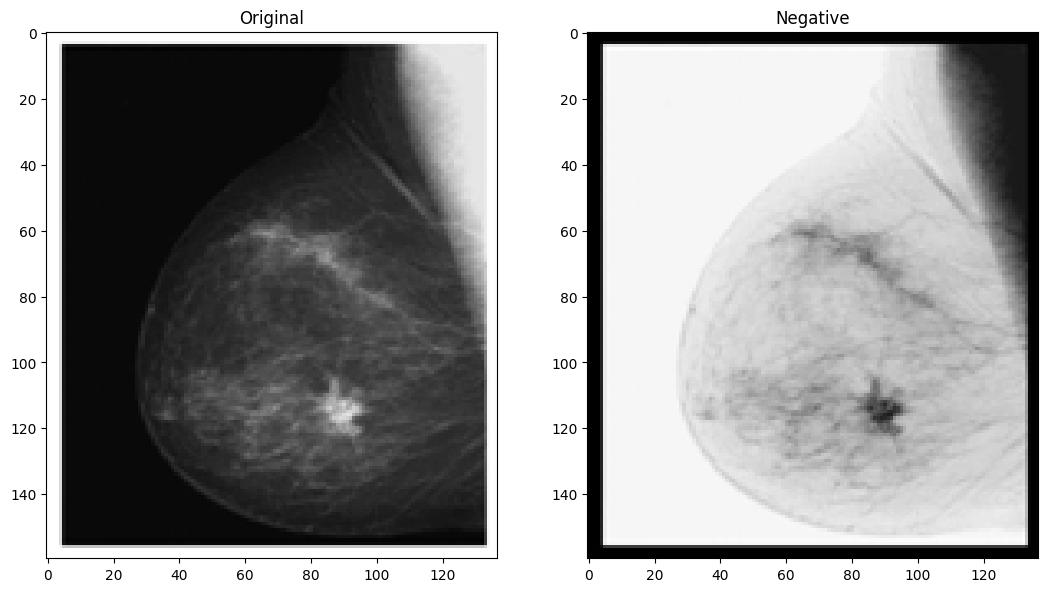

In [4]:
'''
1
Negative Transformation
'''

def negative_transform(img, threshold=255):
    return threshold - img

test_img = io.imread('imgs/Picture1.png', as_gray=True)

test_out = negative_transform(test_img)

show_images([test_img, test_out], ['Original', 'Negative'])


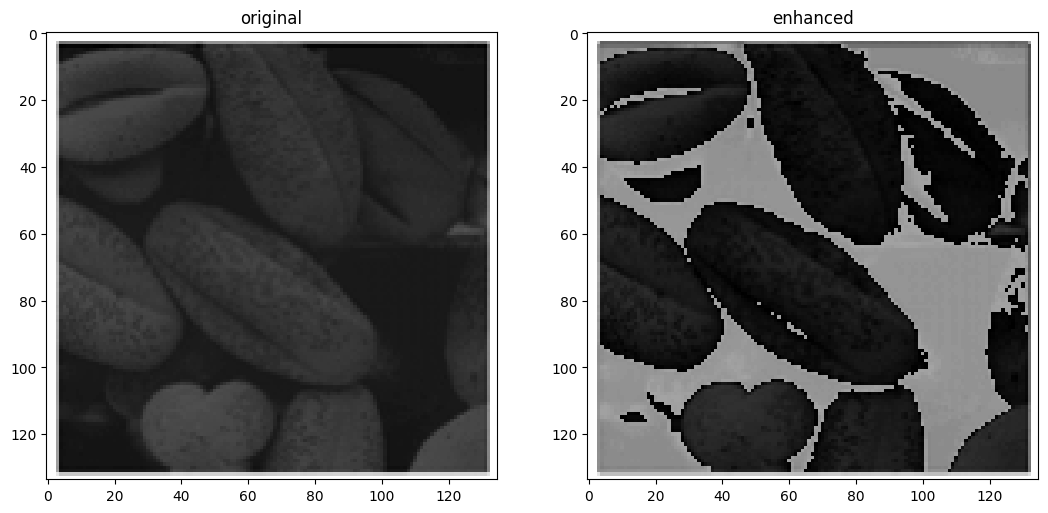

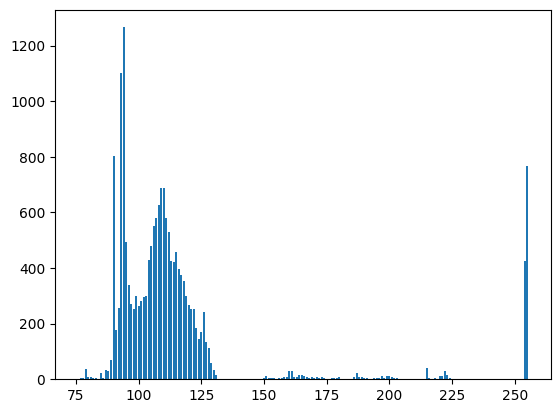

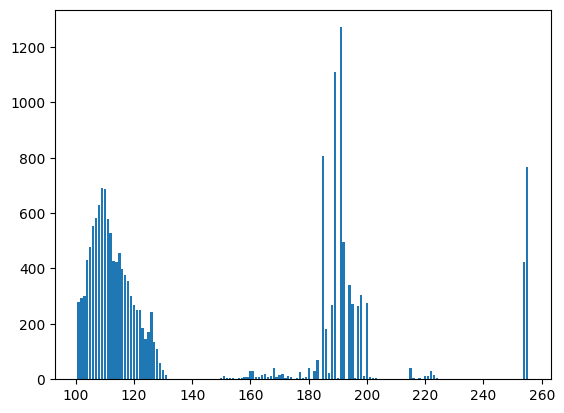

In [85]:
'''
2
Contrast Enhancement
'''
import skimage

img = io.imread('imgs/Picture2.png', as_gray=True)
img = skimage.util.img_as_ubyte(img)


def contrast_enhancement(img):
    new_img = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] <= 100 and img[i][j] >= 0):
                new_img[i][j] = img[i][j] * 1.5 + 50
            else:
                new_img[i][j] = img[i][j]
    
    return new_img


new_img = contrast_enhancement(img)

show_images([img, new_img], ['original', 'enhanced'])
showHist(img)
showHist(new_img)


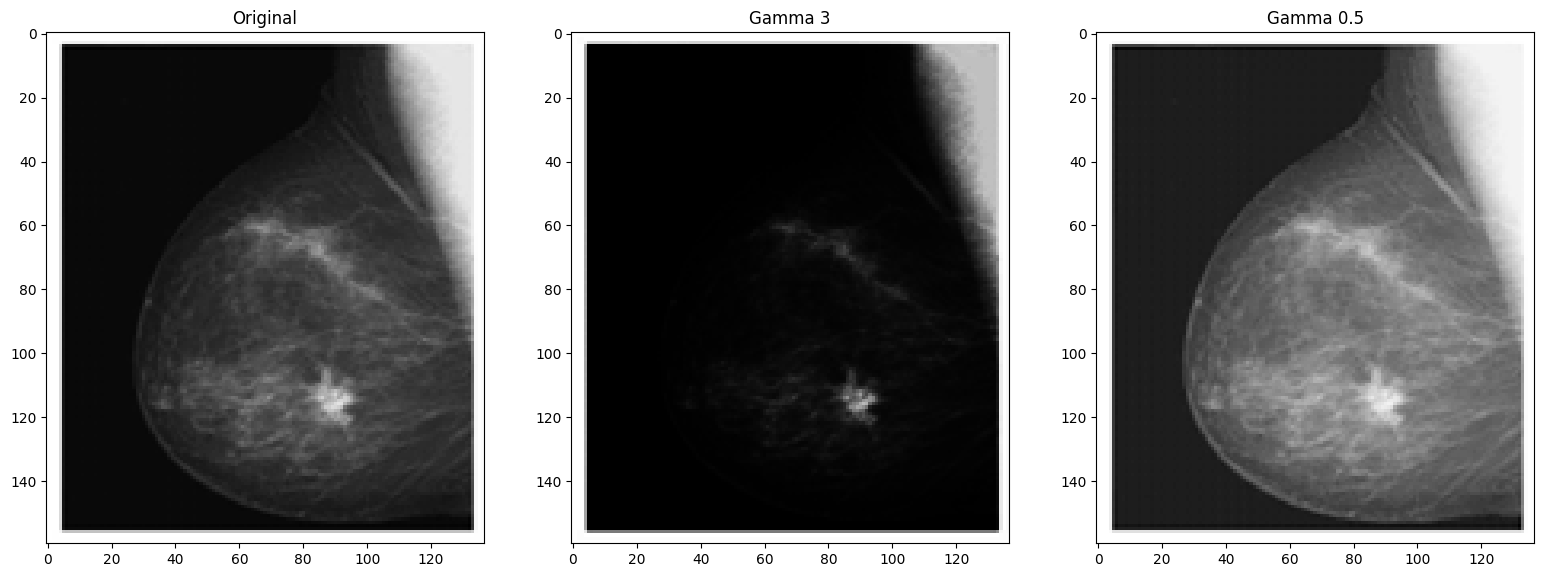

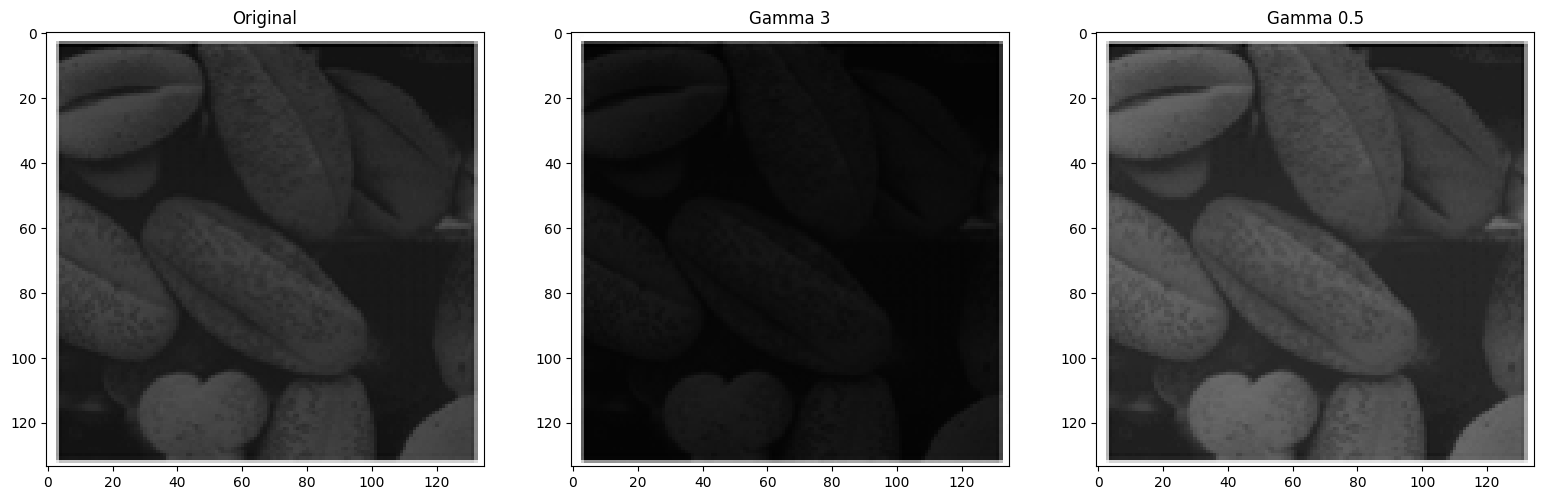

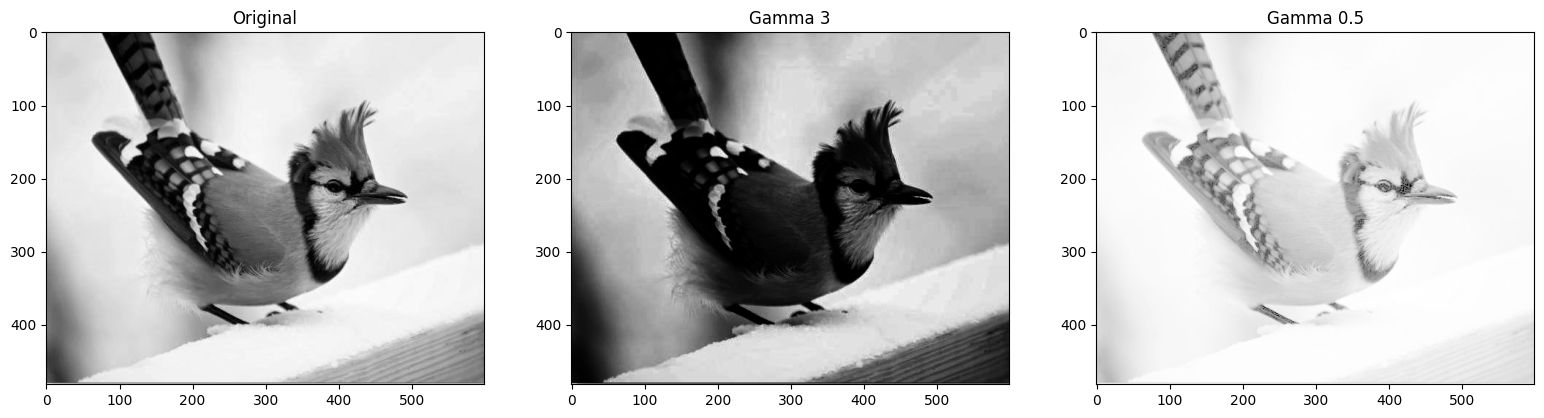

In [118]:
'''
3
Gamma Correction
'''

'''
decreasing gamma value will make the image more bright
'''


import skimage

def gamma_tansform(img, c=1, gamma=3.2):
    return c * img ** gamma

def run_gamma_test(img_path):
    test_img = io.imread(img_path, as_gray=True)
    test_img = skimage.util.img_as_float(test_img)


    test_out_1 = gamma_tansform(test_img, 1, 3)
    test_out_2 = gamma_tansform(test_img, 1, 0.2)

    show_images([test_img, test_out_1, test_out_2], ['Original', 'Gamma 3', 'Gamma 0.5'])


run_gamma_test('imgs/Picture1.png')
run_gamma_test('imgs/Picture2.png')
run_gamma_test('imgs/bird.jpg')



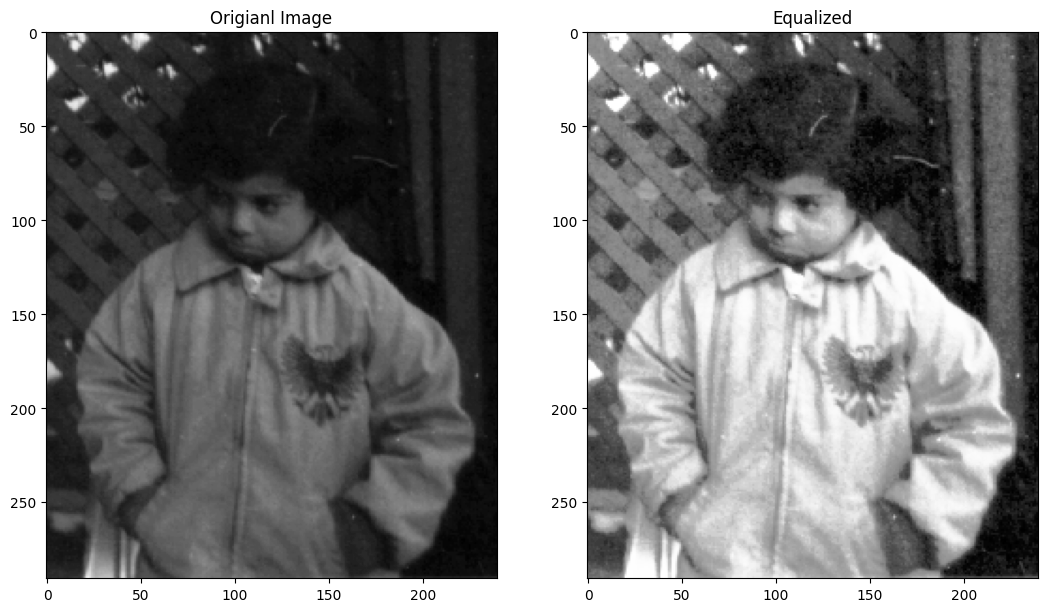

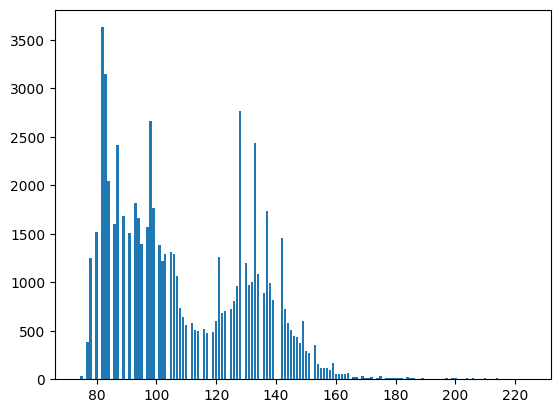

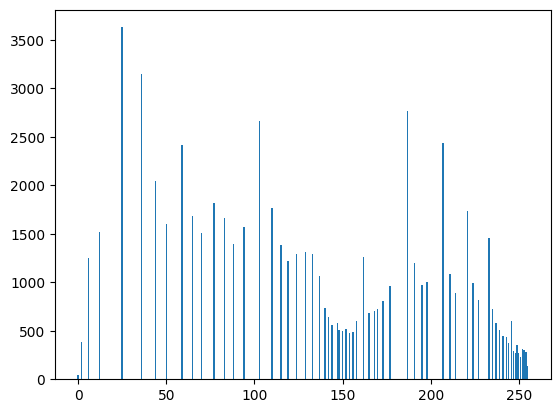

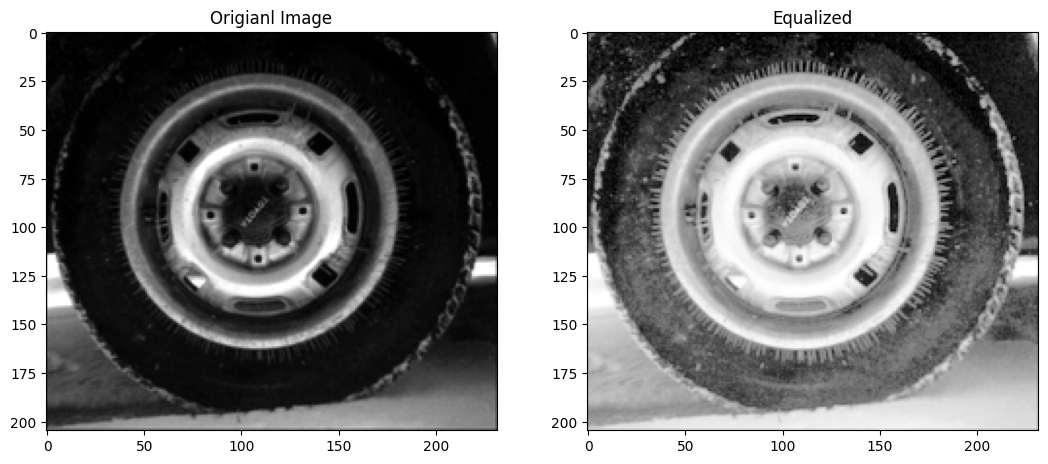

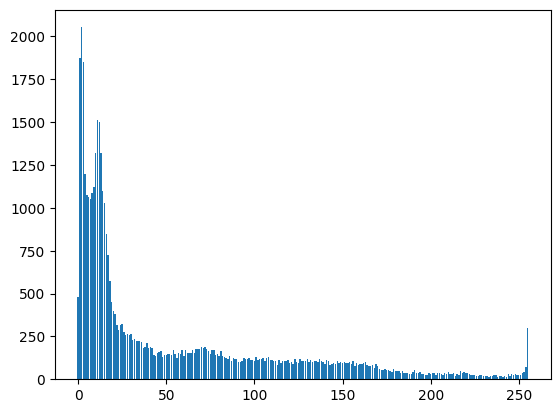

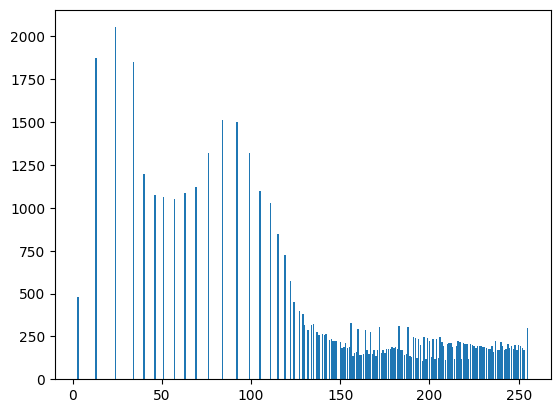

In [49]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
images = ['imgs/pout.tif', 'imgs/tire.tif']

def getImageWithHist(path, nbins=256):

    origianl = io.imread(path, as_gray=True)
    origianl_histogram = histogram(origianl, nbins=256, source_range='dtype')[0]
    pdf = origianl_histogram / origianl.size
    cdf = np.cumsum(pdf)
    eq_map = np.round(cdf * (nbins - 1))

    new_img = np.zeros_like(origianl)

    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i][j] = eq_map[origianl[i][j]]

    show_images([origianl, new_img], ['Origianl Image', 'Equalized'])
    showHist(origianl)
    showHist(new_img)
    plt.show()
    
    
for image_path in images:
    getImageWithHist(image_path)
    


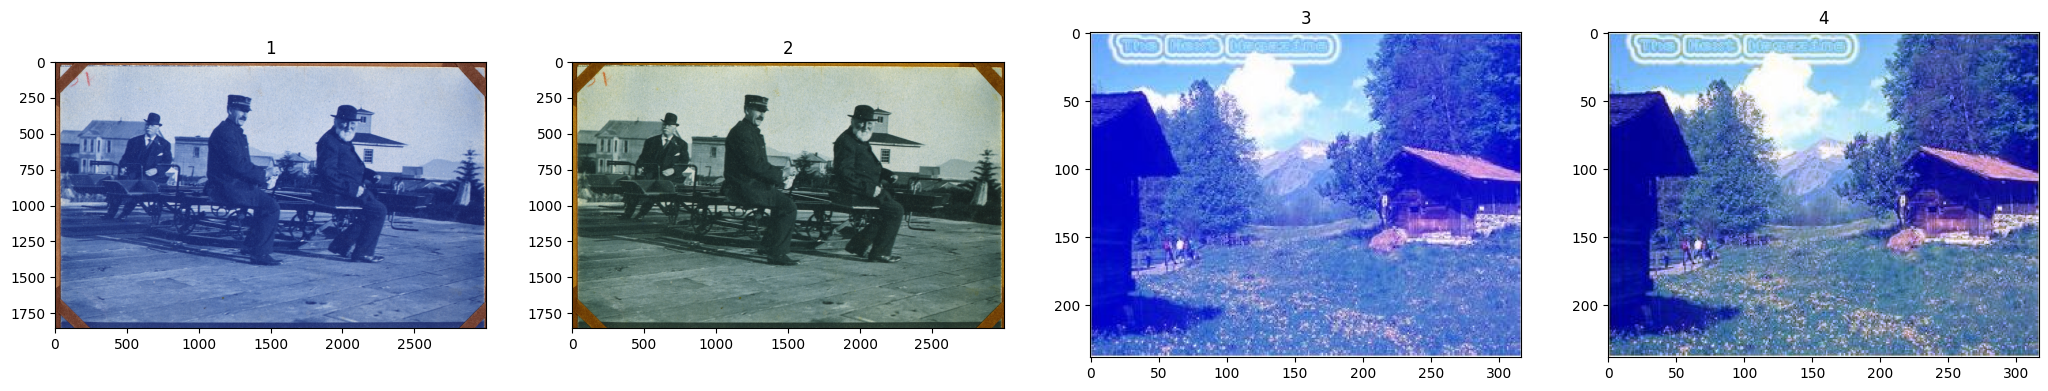

In [117]:
def fix_blue_light(img_path):
    original = io.imread(img_path)

    red, green, blue = original[:,:,0], original[:,:,1], original[:,:,2]

    blue_float64 = skimage.util.img_as_float64(blue)
    blue_float64 = gamma_tansform(blue_float64)
    blue = skimage.util.img_as_ubyte(blue_float64)

    new_img = np.stack([red,green,blue], axis=2)

    return new_img

images = ['1.jpg', '2.jpg']

to_show = []

for image in images:
    to_show.append(io.imread(image))
    to_show.append(fix_blue_light(image))
    

show_images(to_show, ['1', '2', '3', '4'])


